In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("life_expectancy_cleaned.csv")

In [4]:
df

,Country,Year,LifeExpectancy,InfantMortality,Status
0,Afghanistan,2015,65.0,1.736966,Developing
1,Afghanistan,2014,59.9,1.759476,Developing
2,Afghanistan,2013,59.9,1.781304,Developing
3,Albania,2015,77.8,-1.247157,Developing
4,Albania,2014,77.5,-1.247157,Developing
...,...,...,...,...,...
2199,Zimbabwe,2004,44.3,1.152888,Developing
2200,Zimbabwe,2003,44.5,1.126694,Developing
2201,Zimbabwe,2002,44.8,1.099511,Developing
2202,Zimbabwe,2001,45.3,1.099511,Developing


In [5]:
df.head()

,Country,Year,LifeExpectancy,InfantMortality,Status
0,Afghanistan,2015,65.0,1.736966,Developing
1,Afghanistan,2014,59.9,1.759476,Developing
2,Afghanistan,2013,59.9,1.781304,Developing
3,Albania,2015,77.8,-1.247157,Developing
4,Albania,2014,77.5,-1.247157,Developing


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2204 entries, 0 to 2203
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          2204 non-null   object 
 1   Year             2204 non-null   int64  
 2   LifeExpectancy   2204 non-null   float64
 3   InfantMortality  2204 non-null   float64
 4   Status           2204 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 86.2+ KB


In [7]:
df.isnull().sum()

Country            0
Year               0
LifeExpectancy     0
InfantMortality    0
Status             0
dtype: int64

In [8]:
df.mean(numeric_only=True) # mean

Year               2.007619e+03
LifeExpectancy     6.785277e+01
InfantMortality    8.382083e-17
dtype: float64

In [9]:
df.median(numeric_only=True) #median

Year               2008.000000
LifeExpectancy       69.900000
InfantMortality      -0.087947
dtype: float64

In [10]:
df.std(numeric_only=True) #standard deviation

Year               4.612128
LifeExpectancy     8.719670
InfantMortality    1.000227
dtype: float64

In [11]:
df.describe()

,Year,LifeExpectancy,InfantMortality
count,2204.000000,2204.000000,2.204000e+03
mean,2007.619328,67.852768,8.382083e-17
std,4.612128,8.719670,1.000227e+00
min,2000.000000,42.300000,-1.247157e+00
25%,2004.000000,62.300000,-7.479123e-01
50%,2008.000000,69.900000,-8.794727e-02
75%,2012.000000,74.200000,9.105413e-01
max,2015.000000,89.000000,1.802489e+00


skewed distributions

In [12]:
skew_values = df.skew(numeric_only=True)

print("Skewness Values:")
print(skew_values)

Skewness Values:
Year              -0.031180
LifeExpectancy    -0.709924
InfantMortality    0.221814
dtype: float64


In [13]:
for column, value in skew_values.items():
    if value > 0:
        print(f"{column} is Positively Skewed (Right Skewed)")
    elif value < 0:
        print(f"{column} is Negatively Skewed (Left Skewed)")
    else:
        print(f"{column} is Normally Distributed")

Year is Negatively Skewed (Left Skewed)
LifeExpectancy is Negatively Skewed (Left Skewed)
InfantMortality is Positively Skewed (Right Skewed)


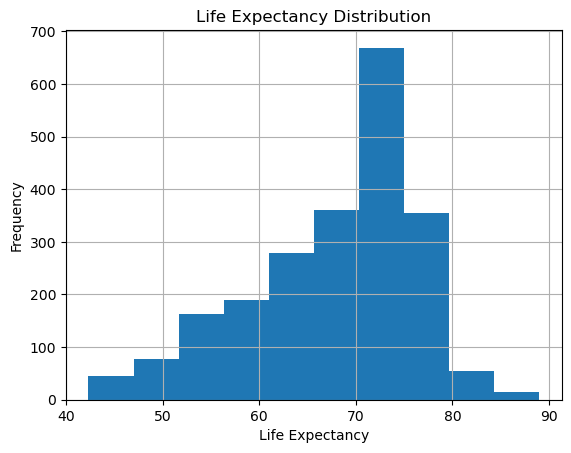

In [14]:
# Plot histogram for LifeExpectancy
df["LifeExpectancy"].hist()
plt.title("Life Expectancy Distribution")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.show()

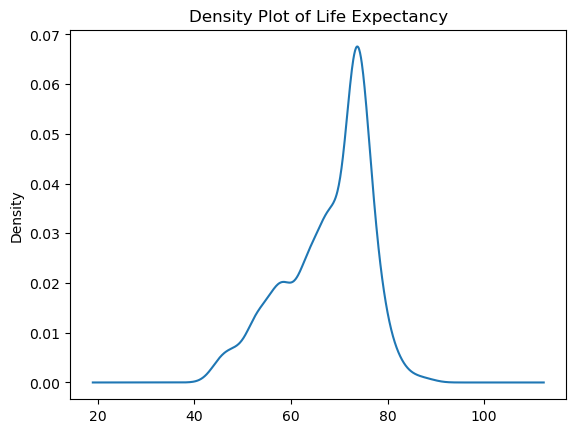

In [15]:
df["LifeExpectancy"].plot(kind="kde")
plt.title("Density Plot of Life Expectancy")
plt.show()

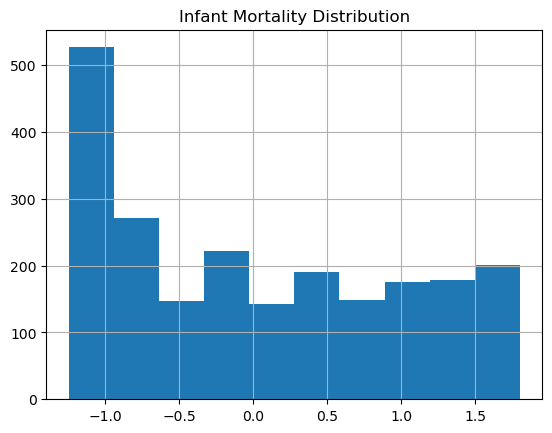

In [16]:
df["InfantMortality"].hist()
plt.title("Infant Mortality Distribution")
plt.show()

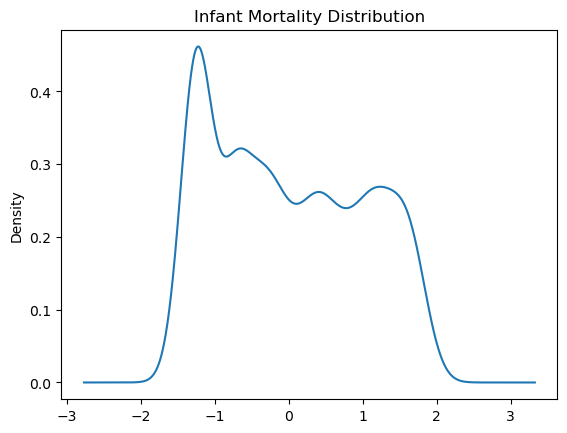

In [17]:
df["InfantMortality"].plot(kind="kde")
plt.title("Infant Mortality Distribution")
plt.show()

Correlation analysis

In [18]:
numeric_df = df.select_dtypes(include=["number"])
numeric_df

,Year,LifeExpectancy,InfantMortality
0,2015,65.0,1.736966
1,2014,59.9,1.759476
2,2013,59.9,1.781304
3,2015,77.8,-1.247157
4,2014,77.5,-1.247157
...,...,...,...
2199,2004,44.3,1.152888
2200,2003,44.5,1.126694
2201,2002,44.8,1.099511
2202,2001,45.3,1.099511


In [19]:
correlation_matrix = numeric_df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                     Year  LifeExpectancy  InfantMortality
Year             1.000000        0.166058        -0.027725
LifeExpectancy   0.166058        1.000000        -0.537740
InfantMortality -0.027725       -0.537740         1.000000


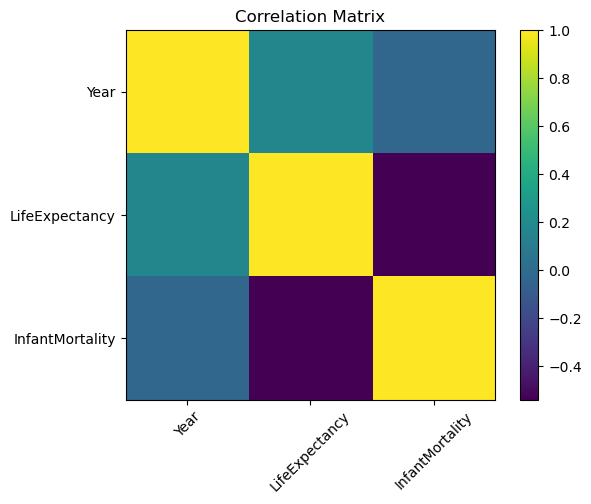

In [20]:
plt.imshow(correlation_matrix)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Correlation Matrix")
plt.show()

In [21]:
print(df["LifeExpectancy"].corr(df["InfantMortality"]))

-0.5377398869595396


visualizations Trend Analysis (Over Years)

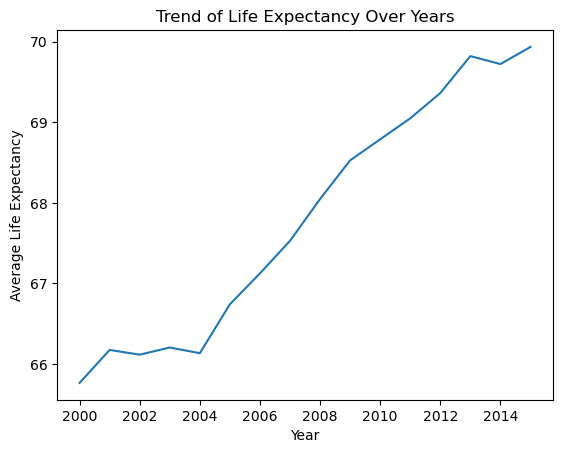

In [22]:
#Life Expectancy Trend
yearly_avg = df.groupby("Year")["LifeExpectancy"].mean()

plt.plot(yearly_avg)
plt.title("Trend of Life Expectancy Over Years")
plt.xlabel("Year")
plt.ylabel("Average Life Expectancy")
plt.show()

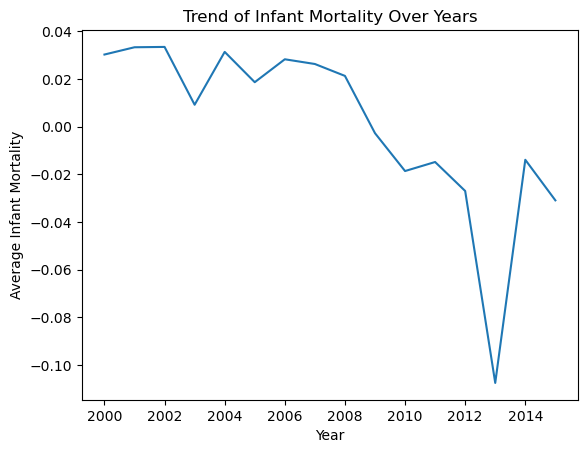

In [23]:
#Infant Mortality Trend
yearly_mortality = df.groupby("Year")["InfantMortality"].mean()

plt.plot(yearly_mortality)
plt.title("Trend of Infant Mortality Over Years")
plt.xlabel("Year")
plt.ylabel("Average Infant Mortality")
plt.show()